In [28]:

import pandas as pd
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [29]:
df = pd.read_csv('Resources/uswhites.csv')
df.head()

,ID,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,4,14.1,White,US,This white has an expert level of intensity an...,Dutton Ranch Walker Hill Vineyard,50.0,94,California,Sonoma,Green Valley,Dutton-Goldfield 2016 Dutton Ranch Walker Hill...,https://www.winemag.com/buying-guide/dutton-go...,Chardonnay,2016,Dutton-Goldfield
1,39,12.6,White,US,"Stunning aromatics combine spicy citrus, tangy...",Maresh Vineyard Old Vine,30.0,94,Oregon,Willamette Valley,Dundee Hills,Harper Voit 2016 Maresh Vineyard Old Vine Ries...,https://www.winemag.com/buying-guide/harper-vo...,Riesling,2016,Harper Voit
2,53,13.8,White,US,"This is a structured and remarkable wine, burs...",Year of the Monkey Single Vineyard,60.0,94,California,Napa-Sonoma,Carneros,Donum 2016 Year of the Monkey Single Vineyard ...,https://www.winemag.com/buying-guide/donum-201...,Chardonnay,2016,Donum
3,56,13.8,White,US,The wine's aromas are arresting in notes of le...,Chaleur Blanc,35.0,94,Washington,Columbia Valley,Columbia Valley (WA),DeLille 2017 Chaleur Blanc White (Columbia Val...,https://www.winemag.com/buying-guide/delille-2...,Bordeaux-style White Blend,2017,DeLille
4,74,14.7,White,US,"This is a grainy, structured and textured whit...",Lewis MacGregor Estate Vineyard,65.0,94,California,Sonoma,Russian River Valley,Williams Selyem 2016 Lewis MacGregor Estate Vi...,https://www.winemag.com/buying-guide/williams-...,Chardonnay,2016,Williams Selyem


In [30]:
df = df.drop(['ID', 'category', 'country', 'description', 'designation', 'subsubregion', 'title', 'url', 'winery'], axis=1)
df.head()


,alcohol,price,rating,region,subregion,varietal,vintage
0,14.1,50.0,94,California,Sonoma,Chardonnay,2016
1,12.6,30.0,94,Oregon,Willamette Valley,Riesling,2016
2,13.8,60.0,94,California,Napa-Sonoma,Chardonnay,2016
3,13.8,35.0,94,Washington,Columbia Valley,Bordeaux-style White Blend,2017
4,14.7,65.0,94,California,Sonoma,Chardonnay,2016


In [31]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)
X_df['vintage'] = X_df['vintage'].astype(int)

In [32]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [33]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,rating,region,subregion,varietal,vintage
0,130,14,2,42,17,22
1,68,14,17,56,87,22
2,118,14,2,28,17,22
3,118,14,24,7,10,23
4,152,14,2,42,17,22
...,...,...,...,...,...,...
23653,147,11,2,3,17,11
23654,147,12,2,3,17,11
23655,159,12,2,3,17,11
23656,176,12,2,42,138,10


In [34]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[130.  14.   2.  42.  17.  22.]
 [ 68.  14.  17.  56.  87.  22.]
 [118.  14.   2.  28.  17.  22.]
 ...
 [159.  12.   2.   3.  17.  11.]
 [176.  12.   2.  42. 138.  10.]
 [139.  12.   2.   2.  17.  11.]]
[50. 30. 60. ... 29. 24. 55.]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(5915,)
(5915, 6)


In [36]:
# scaler_model = MinMaxScaler()

In [37]:
# y_train=y_train.reshape(-1,1)
# y_test=y_test.reshape(-1,1)

In [38]:
# X_scaler = scaler_model.fit(X_train)

In [39]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [40]:
input_dims = X_train.shape[1]
input_dims

6

In [41]:
model = Sequential()
model.add(Dense(12, activation = 'relu', name='dense_1', kernel_initializer='random_uniform', input_dim=(input_dims)))
model.add(Dense(8, activation='relu', name='dense_2', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear', name='predictions'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
predictions (Dense)          (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [42]:
import numpy as np

In [43]:
from numpy import sqrt,asarray
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=10,  verbose=1, validation_split=0.2)


Train on 14194 samples, validate on 3549 samples
Epoch 1/1000
14194/14194 [==============================] - 2s 124us/step - loss: 139.7942 - mse: 139.7943 - mae: 8.2651 - val_loss: 98.6939 - val_mse: 98.6938 - val_mae: 7.2942
Epoch 2/1000
14194/14194 [==============================] - 2s 111us/step - loss: 101.3781 - mse: 101.3781 - mae: 7.0895 - val_loss: 91.0675 - val_mse: 91.0674 - val_mae: 6.9590
Epoch 3/1000
14194/14194 [==============================] - 1s 91us/step - loss: 97.5953 - mse: 97.5953 - mae: 6.9313 - val_loss: 89.6754 - val_mse: 89.6754 - val_mae: 6.8015
Epoch 4/1000
14194/14194 [==============================] - 2s 111us/step - loss: 96.8581 - mse: 96.8580 - mae: 6.9021 - val_loss: 89.0868 - val_mse: 89.0868 - val_mae: 6.7527
Epoch 5/1000
14194/14194 [==============================] - 2s 140us/step - loss: 95.8499 - mse: 95.8499 - mae: 6.8688 - val_loss: 88.5389 - val_mse: 88.5389 - val_mae: 6.7594
Epoch 6/1000
14194/14194 [==============================] - 2s 139us

14194/14194 [==============================] - 2s 124us/step - loss: 93.4929 - mse: 93.4931 - mae: 6.7573 - val_loss: 87.6619 - val_mse: 87.6619 - val_mae: 6.8157
Epoch 48/1000
14194/14194 [==============================] - 2s 127us/step - loss: 93.4529 - mse: 93.4529 - mae: 6.7557 - val_loss: 89.8799 - val_mse: 89.8799 - val_mae: 7.1062
Epoch 49/1000
14194/14194 [==============================] - 2s 124us/step - loss: 93.3478 - mse: 93.3477 - mae: 6.7547 - val_loss: 86.5305 - val_mse: 86.5306 - val_mae: 6.6135
Epoch 50/1000
14194/14194 [==============================] - 2s 126us/step - loss: 93.4657 - mse: 93.4658 - mae: 6.7583 - val_loss: 86.8877 - val_mse: 86.8877 - val_mae: 6.8060
Epoch 51/1000
14194/14194 [==============================] - 2s 127us/step - loss: 93.3751 - mse: 93.3751 - mae: 6.7569 - val_loss: 86.3853 - val_mse: 86.3853 - val_mae: 6.6412
Epoch 52/1000
14194/14194 [==============================] - 2s 131us/step - loss: 93.3600 - mse: 93.3599 - mae: 6.7514 - val_los

14194/14194 [==============================] - 2s 126us/step - loss: 90.2052 - mse: 90.2051 - mae: 6.6368 - val_loss: 84.6703 - val_mse: 84.6703 - val_mae: 6.4928
Epoch 94/1000
14194/14194 [==============================] - 2s 135us/step - loss: 90.1390 - mse: 90.1389 - mae: 6.6388 - val_loss: 84.1116 - val_mse: 84.1116 - val_mae: 6.5192
Epoch 95/1000
14194/14194 [==============================] - 2s 132us/step - loss: 89.7908 - mse: 89.7908 - mae: 6.6127 - val_loss: 85.8215 - val_mse: 85.8216 - val_mae: 6.4849
Epoch 96/1000
14194/14194 [==============================] - 2s 128us/step - loss: 90.3127 - mse: 90.3127 - mae: 6.6429 - val_loss: 83.8791 - val_mse: 83.8791 - val_mae: 6.6645
Epoch 97/1000
14194/14194 [==============================] - 2s 130us/step - loss: 90.1887 - mse: 90.1888 - mae: 6.6343 - val_loss: 83.6919 - val_mse: 83.6919 - val_mae: 6.4550
Epoch 98/1000
14194/14194 [==============================] - 2s 132us/step - loss: 90.1274 - mse: 90.1273 - mae: 6.6216 - val_los

14194/14194 [==============================] - 2s 157us/step - loss: 89.5553 - mse: 89.5553 - mae: 6.6126 - val_loss: 83.9034 - val_mse: 83.9035 - val_mae: 6.4616
Epoch 140/1000
14194/14194 [==============================] - 2s 159us/step - loss: 89.3222 - mse: 89.3222 - mae: 6.5909 - val_loss: 83.1560 - val_mse: 83.1560 - val_mae: 6.4760
Epoch 141/1000
14194/14194 [==============================] - 2s 158us/step - loss: 89.6121 - mse: 89.6120 - mae: 6.6044 - val_loss: 83.6941 - val_mse: 83.6941 - val_mae: 6.4955
Epoch 142/1000
14194/14194 [==============================] - 2s 167us/step - loss: 89.8543 - mse: 89.8543 - mae: 6.6150 - val_loss: 83.5483 - val_mse: 83.5483 - val_mae: 6.5720
Epoch 143/1000
14194/14194 [==============================] - 3s 194us/step - loss: 89.5466 - mse: 89.5466 - mae: 6.6095 - val_loss: 85.3715 - val_mse: 85.3715 - val_mae: 6.4159
Epoch 144/1000
14194/14194 [==============================] - 2s 160us/step - loss: 89.5277 - mse: 89.5277 - mae: 6.6081 - va

14194/14194 [==============================] - 2s 150us/step - loss: 89.0116 - mse: 89.0116 - mae: 6.5913 - val_loss: 83.4751 - val_mse: 83.4750 - val_mae: 6.6750
Epoch 186/1000
14194/14194 [==============================] - 2s 153us/step - loss: 89.0086 - mse: 89.0086 - mae: 6.5798 - val_loss: 85.1393 - val_mse: 85.1393 - val_mae: 6.8708
Epoch 187/1000
14194/14194 [==============================] - 2s 153us/step - loss: 89.2622 - mse: 89.2622 - mae: 6.5955 - val_loss: 84.3270 - val_mse: 84.3270 - val_mae: 6.7161
Epoch 188/1000
14194/14194 [==============================] - 2s 159us/step - loss: 89.2107 - mse: 89.2106 - mae: 6.5876 - val_loss: 82.8854 - val_mse: 82.8854 - val_mae: 6.5804
Epoch 189/1000
14194/14194 [==============================] - 2s 162us/step - loss: 89.1315 - mse: 89.1315 - mae: 6.5939 - val_loss: 82.6758 - val_mse: 82.6758 - val_mae: 6.4718
Epoch 190/1000
14194/14194 [==============================] - 2s 161us/step - loss: 89.0545 - mse: 89.0544 - mae: 6.5872 - va

14194/14194 [==============================] - 2s 158us/step - loss: 88.7781 - mse: 88.7781 - mae: 6.5683 - val_loss: 82.8162 - val_mse: 82.8163 - val_mae: 6.5115
Epoch 232/1000
14194/14194 [==============================] - 2s 158us/step - loss: 88.9214 - mse: 88.9215 - mae: 6.5768 - val_loss: 82.9280 - val_mse: 82.9279 - val_mae: 6.4922
Epoch 233/1000
14194/14194 [==============================] - 2s 158us/step - loss: 88.6070 - mse: 88.6070 - mae: 6.5736 - val_loss: 82.6222 - val_mse: 82.6221 - val_mae: 6.5268
Epoch 234/1000
14194/14194 [==============================] - 2s 157us/step - loss: 88.7689 - mse: 88.7689 - mae: 6.5755 - val_loss: 82.6326 - val_mse: 82.6326 - val_mae: 6.5095
Epoch 235/1000
14194/14194 [==============================] - 2s 159us/step - loss: 88.8343 - mse: 88.8344 - mae: 6.5840 - val_loss: 82.8871 - val_mse: 82.8871 - val_mae: 6.5008
Epoch 236/1000
14194/14194 [==============================] - 2s 160us/step - loss: 88.6636 - mse: 88.6636 - mae: 6.5727 - va

14194/14194 [==============================] - 2s 159us/step - loss: 88.7494 - mse: 88.7494 - mae: 6.5733 - val_loss: 82.4884 - val_mse: 82.4884 - val_mae: 6.4555
Epoch 278/1000
14194/14194 [==============================] - 2s 159us/step - loss: 88.6651 - mse: 88.6651 - mae: 6.5685 - val_loss: 82.7969 - val_mse: 82.7970 - val_mae: 6.5244
Epoch 279/1000
14194/14194 [==============================] - 2s 158us/step - loss: 88.6750 - mse: 88.6749 - mae: 6.5695 - val_loss: 82.4544 - val_mse: 82.4544 - val_mae: 6.4896
Epoch 280/1000
14194/14194 [==============================] - 2s 160us/step - loss: 88.6192 - mse: 88.6192 - mae: 6.5695 - val_loss: 82.6167 - val_mse: 82.6167 - val_mae: 6.4591
Epoch 281/1000
14194/14194 [==============================] - 2s 167us/step - loss: 88.6032 - mse: 88.6032 - mae: 6.5860 - val_loss: 83.9883 - val_mse: 83.9883 - val_mae: 6.4350
Epoch 282/1000
14194/14194 [==============================] - 2s 163us/step - loss: 88.5457 - mse: 88.5457 - mae: 6.5687 - va

14194/14194 [==============================] - 2s 137us/step - loss: 88.7033 - mse: 88.7033 - mae: 6.5723 - val_loss: 82.5876 - val_mse: 82.5876 - val_mae: 6.4496
Epoch 324/1000
14194/14194 [==============================] - 2s 135us/step - loss: 88.3898 - mse: 88.3898 - mae: 6.5646 - val_loss: 82.4087 - val_mse: 82.4088 - val_mae: 6.4515
Epoch 325/1000
14194/14194 [==============================] - 2s 143us/step - loss: 88.7191 - mse: 88.7191 - mae: 6.5707 - val_loss: 82.1665 - val_mse: 82.1665 - val_mae: 6.4675
Epoch 326/1000
14194/14194 [==============================] - 2s 146us/step - loss: 88.5719 - mse: 88.5719 - mae: 6.5687 - val_loss: 83.4045 - val_mse: 83.4046 - val_mae: 6.4702
Epoch 327/1000
14194/14194 [==============================] - 2s 131us/step - loss: 88.3233 - mse: 88.3233 - mae: 6.5659 - val_loss: 82.7552 - val_mse: 82.7552 - val_mae: 6.6093
Epoch 328/1000
14194/14194 [==============================] - 2s 130us/step - loss: 88.6065 - mse: 88.6065 - mae: 6.5776 - va

14194/14194 [==============================] - 2s 130us/step - loss: 88.6233 - mse: 88.6232 - mae: 6.5751 - val_loss: 82.7350 - val_mse: 82.7350 - val_mae: 6.5406
Epoch 370/1000
14194/14194 [==============================] - 2s 137us/step - loss: 88.6026 - mse: 88.6026 - mae: 6.5681 - val_loss: 82.8474 - val_mse: 82.8474 - val_mae: 6.5384
Epoch 371/1000
14194/14194 [==============================] - 2s 138us/step - loss: 88.2784 - mse: 88.2785 - mae: 6.5679 - val_loss: 85.1697 - val_mse: 85.1697 - val_mae: 6.9008
Epoch 372/1000
14194/14194 [==============================] - 2s 135us/step - loss: 88.3263 - mse: 88.3262 - mae: 6.5557 - val_loss: 82.6791 - val_mse: 82.6791 - val_mae: 6.4511
Epoch 373/1000
14194/14194 [==============================] - 2s 128us/step - loss: 88.7206 - mse: 88.7206 - mae: 6.5792 - val_loss: 82.1635 - val_mse: 82.1635 - val_mae: 6.5016
Epoch 374/1000
14194/14194 [==============================] - 2s 154us/step - loss: 88.4860 - mse: 88.4860 - mae: 6.5601 - va

14194/14194 [==============================] - 2s 135us/step - loss: 88.5771 - mse: 88.5772 - mae: 6.5807 - val_loss: 83.7943 - val_mse: 83.7943 - val_mae: 6.4331
Epoch 416/1000
14194/14194 [==============================] - 2s 139us/step - loss: 88.6322 - mse: 88.6322 - mae: 6.5739 - val_loss: 82.2125 - val_mse: 82.2125 - val_mae: 6.4777
Epoch 417/1000
14194/14194 [==============================] - 2s 134us/step - loss: 88.3282 - mse: 88.3282 - mae: 6.5627 - val_loss: 82.3716 - val_mse: 82.3716 - val_mae: 6.4551
Epoch 418/1000
14194/14194 [==============================] - 2s 145us/step - loss: 88.6491 - mse: 88.6491 - mae: 6.5706 - val_loss: 82.5020 - val_mse: 82.5020 - val_mae: 6.4716
Epoch 419/1000
14194/14194 [==============================] - 2s 152us/step - loss: 88.4742 - mse: 88.4743 - mae: 6.5683 - val_loss: 82.6857 - val_mse: 82.6857 - val_mae: 6.4322
Epoch 420/1000
14194/14194 [==============================] - 2s 126us/step - loss: 88.3334 - mse: 88.3334 - mae: 6.5515 - va

14194/14194 [==============================] - 1s 97us/step - loss: 88.1778 - mse: 88.1778 - mae: 6.5622 - val_loss: 83.0811 - val_mse: 83.0811 - val_mae: 6.6683
Epoch 462/1000
14194/14194 [==============================] - 1s 99us/step - loss: 88.4217 - mse: 88.4217 - mae: 6.5678 - val_loss: 82.9395 - val_mse: 82.9395 - val_mae: 6.4067
Epoch 463/1000
14194/14194 [==============================] - 1s 97us/step - loss: 88.3879 - mse: 88.3879 - mae: 6.5634 - val_loss: 82.8761 - val_mse: 82.8761 - val_mae: 6.6467
Epoch 464/1000
14194/14194 [==============================] - 1s 98us/step - loss: 88.4682 - mse: 88.4682 - mae: 6.5630 - val_loss: 83.5441 - val_mse: 83.5441 - val_mae: 6.4284
Epoch 465/1000
14194/14194 [==============================] - 1s 102us/step - loss: 88.3427 - mse: 88.3427 - mae: 6.5652 - val_loss: 82.6184 - val_mse: 82.6184 - val_mae: 6.4610
Epoch 466/1000
14194/14194 [==============================] - 2s 108us/step - loss: 88.2606 - mse: 88.2605 - mae: 6.5568 - val_lo

14194/14194 [==============================] - 2s 125us/step - loss: 88.3196 - mse: 88.3196 - mae: 6.5613 - val_loss: 81.9451 - val_mse: 81.9451 - val_mae: 6.5213
Epoch 508/1000
14194/14194 [==============================] - 2s 112us/step - loss: 88.2265 - mse: 88.2265 - mae: 6.5673 - val_loss: 82.9920 - val_mse: 82.9920 - val_mae: 6.4458
Epoch 509/1000
14194/14194 [==============================] - 2s 140us/step - loss: 88.2869 - mse: 88.2869 - mae: 6.5704 - val_loss: 82.0381 - val_mse: 82.0382 - val_mae: 6.4762
Epoch 510/1000
14194/14194 [==============================] - 2s 119us/step - loss: 88.3002 - mse: 88.3001 - mae: 6.5652 - val_loss: 82.9325 - val_mse: 82.9324 - val_mae: 6.4327
Epoch 511/1000
14194/14194 [==============================] - 2s 113us/step - loss: 88.2158 - mse: 88.2159 - mae: 6.5651 - val_loss: 84.4765 - val_mse: 84.4766 - val_mae: 6.4013
Epoch 512/1000
14194/14194 [==============================] - 2s 114us/step - loss: 88.1805 - mse: 88.1806 - mae: 6.5577 - va

14194/14194 [==============================] - 1s 102us/step - loss: 88.2377 - mse: 88.2377 - mae: 6.5645 - val_loss: 82.1976 - val_mse: 82.1976 - val_mae: 6.5817
Epoch 554/1000
14194/14194 [==============================] - 1s 105us/step - loss: 88.2634 - mse: 88.2634 - mae: 6.5636 - val_loss: 83.2501 - val_mse: 83.2501 - val_mae: 6.5923
Epoch 555/1000
14194/14194 [==============================] - 1s 103us/step - loss: 88.0389 - mse: 88.0388 - mae: 6.5535 - val_loss: 82.0320 - val_mse: 82.0320 - val_mae: 6.4098
Epoch 556/1000
14194/14194 [==============================] - 1s 105us/step - loss: 88.0520 - mse: 88.0520 - mae: 6.5447 - val_loss: 82.6502 - val_mse: 82.6502 - val_mae: 6.5238
Epoch 557/1000
14194/14194 [==============================] - 1s 103us/step - loss: 88.0809 - mse: 88.0809 - mae: 6.5424 - val_loss: 83.1444 - val_mse: 83.1444 - val_mae: 6.4857
Epoch 558/1000
14194/14194 [==============================] - 1s 101us/step - loss: 88.3277 - mse: 88.3277 - mae: 6.5518 - va

14194/14194 [==============================] - 1s 101us/step - loss: 87.9732 - mse: 87.9732 - mae: 6.5277 - val_loss: 83.1749 - val_mse: 83.1749 - val_mae: 6.6496
Epoch 600/1000
14194/14194 [==============================] - 1s 105us/step - loss: 87.8588 - mse: 87.8588 - mae: 6.5359 - val_loss: 84.7689 - val_mse: 84.7689 - val_mae: 6.4648
Epoch 601/1000
14194/14194 [==============================] - 2s 113us/step - loss: 88.0236 - mse: 88.0235 - mae: 6.5364 - val_loss: 82.0233 - val_mse: 82.0233 - val_mae: 6.4630
Epoch 602/1000
14194/14194 [==============================] - 2s 111us/step - loss: 88.0222 - mse: 88.0222 - mae: 6.5354 - val_loss: 81.8541 - val_mse: 81.8542 - val_mae: 6.4932
Epoch 603/1000
14194/14194 [==============================] - 1s 104us/step - loss: 88.0600 - mse: 88.0600 - mae: 6.5443 - val_loss: 82.2058 - val_mse: 82.2058 - val_mae: 6.4031
Epoch 604/1000
14194/14194 [==============================] - 2s 109us/step - loss: 88.1875 - mse: 88.1875 - mae: 6.5514 - va

14194/14194 [==============================] - 2s 119us/step - loss: 87.8584 - mse: 87.8583 - mae: 6.5400 - val_loss: 82.3277 - val_mse: 82.3277 - val_mae: 6.4355
Epoch 646/1000
14194/14194 [==============================] - 2s 119us/step - loss: 87.9916 - mse: 87.9915 - mae: 6.5414 - val_loss: 82.6963 - val_mse: 82.6962 - val_mae: 6.6255
Epoch 647/1000
14194/14194 [==============================] - 2s 121us/step - loss: 88.0568 - mse: 88.0568 - mae: 6.5488 - val_loss: 83.1250 - val_mse: 83.1250 - val_mae: 6.3741
Epoch 648/1000
14194/14194 [==============================] - 2s 120us/step - loss: 88.0187 - mse: 88.0187 - mae: 6.5327 - val_loss: 81.6841 - val_mse: 81.6841 - val_mae: 6.4944
Epoch 649/1000
14194/14194 [==============================] - 2s 125us/step - loss: 87.9907 - mse: 87.9908 - mae: 6.5419 - val_loss: 81.7956 - val_mse: 81.7957 - val_mae: 6.4846
Epoch 650/1000
14194/14194 [==============================] - 2s 121us/step - loss: 87.7191 - mse: 87.7191 - mae: 6.5350 - va

Epoch 691/1000
14194/14194 [==============================] - 1s 105us/step - loss: 87.8474 - mse: 87.8474 - mae: 6.5281 - val_loss: 82.0374 - val_mse: 82.0373 - val_mae: 6.4970
Epoch 692/1000
14194/14194 [==============================] - 1s 92us/step - loss: 87.7889 - mse: 87.7889 - mae: 6.5302 - val_loss: 81.9126 - val_mse: 81.9126 - val_mae: 6.4976
Epoch 693/1000
14194/14194 [==============================] - 1s 96us/step - loss: 87.7057 - mse: 87.7058 - mae: 6.5218 - val_loss: 82.7868 - val_mse: 82.7868 - val_mae: 6.6132
Epoch 694/1000
14194/14194 [==============================] - 1s 103us/step - loss: 87.8459 - mse: 87.8458 - mae: 6.5390 - val_loss: 81.4417 - val_mse: 81.4416 - val_mae: 6.4194
Epoch 695/1000
14194/14194 [==============================] - 1s 99us/step - loss: 87.9643 - mse: 87.9643 - mae: 6.5336 - val_loss: 81.7904 - val_mse: 81.7904 - val_mae: 6.4403
Epoch 696/1000
14194/14194 [==============================] - 1s 101us/step - loss: 88.0024 - mse: 88.0024 - mae:

14194/14194 [==============================] - 2s 126us/step - loss: 87.8103 - mse: 87.8103 - mae: 6.5341 - val_loss: 81.9207 - val_mse: 81.9208 - val_mae: 6.4444
Epoch 738/1000
14194/14194 [==============================] - 2s 135us/step - loss: 87.6670 - mse: 87.6670 - mae: 6.5294 - val_loss: 82.4751 - val_mse: 82.4752 - val_mae: 6.3904
Epoch 739/1000
14194/14194 [==============================] - 2s 112us/step - loss: 87.7075 - mse: 87.7075 - mae: 6.5303 - val_loss: 81.7125 - val_mse: 81.7125 - val_mae: 6.4491
Epoch 740/1000
14194/14194 [==============================] - 2s 125us/step - loss: 87.7457 - mse: 87.7456 - mae: 6.5185 - val_loss: 81.9663 - val_mse: 81.9663 - val_mae: 6.4382
Epoch 741/1000
14194/14194 [==============================] - 2s 121us/step - loss: 87.7320 - mse: 87.7320 - mae: 6.5162 - val_loss: 81.8355 - val_mse: 81.8356 - val_mae: 6.4754
Epoch 742/1000
14194/14194 [==============================] - 2s 130us/step - loss: 87.5658 - mse: 87.5657 - mae: 6.5244 - va

14194/14194 [==============================] - 2s 107us/step - loss: 87.7279 - mse: 87.7280 - mae: 6.5294 - val_loss: 82.2941 - val_mse: 82.2941 - val_mae: 6.4056
Epoch 784/1000
14194/14194 [==============================] - 2s 119us/step - loss: 87.6518 - mse: 87.6518 - mae: 6.5232 - val_loss: 81.5974 - val_mse: 81.5974 - val_mae: 6.4439
Epoch 785/1000
14194/14194 [==============================] - 2s 142us/step - loss: 87.7647 - mse: 87.7647 - mae: 6.5385 - val_loss: 82.6373 - val_mse: 82.6373 - val_mae: 6.3814
Epoch 786/1000
14194/14194 [==============================] - 2s 117us/step - loss: 87.3546 - mse: 87.3547 - mae: 6.5129 - val_loss: 82.2419 - val_mse: 82.2420 - val_mae: 6.4311
Epoch 787/1000
14194/14194 [==============================] - 2s 108us/step - loss: 87.7367 - mse: 87.7367 - mae: 6.5249 - val_loss: 82.7496 - val_mse: 82.7496 - val_mae: 6.3974
Epoch 788/1000
14194/14194 [==============================] - 1s 102us/step - loss: 87.5949 - mse: 87.5950 - mae: 6.5178 - va

14194/14194 [==============================] - 2s 167us/step - loss: 87.5290 - mse: 87.5290 - mae: 6.5138 - val_loss: 82.1764 - val_mse: 82.1764 - val_mae: 6.5734
Epoch 830/1000
14194/14194 [==============================] - 3s 189us/step - loss: 87.5778 - mse: 87.5777 - mae: 6.5249 - val_loss: 82.4144 - val_mse: 82.4144 - val_mae: 6.6021
Epoch 831/1000
14194/14194 [==============================] - 3s 179us/step - loss: 87.4032 - mse: 87.4032 - mae: 6.5226 - val_loss: 81.8998 - val_mse: 81.8998 - val_mae: 6.4184
Epoch 832/1000
14194/14194 [==============================] - 2s 156us/step - loss: 87.5944 - mse: 87.5943 - mae: 6.5210 - val_loss: 81.8007 - val_mse: 81.8006 - val_mae: 6.4492
Epoch 833/1000
14194/14194 [==============================] - 2s 135us/step - loss: 87.6343 - mse: 87.6343 - mae: 6.5261 - val_loss: 82.3313 - val_mse: 82.3313 - val_mae: 6.5155
Epoch 834/1000
14194/14194 [==============================] - 2s 119us/step - loss: 87.5488 - mse: 87.5487 - mae: 6.5265 - va

14194/14194 [==============================] - 2s 129us/step - loss: 87.6663 - mse: 87.6662 - mae: 6.5141 - val_loss: 82.4225 - val_mse: 82.4225 - val_mae: 6.6172
Epoch 876/1000
14194/14194 [==============================] - 2s 117us/step - loss: 87.5505 - mse: 87.5505 - mae: 6.5214 - val_loss: 81.5883 - val_mse: 81.5883 - val_mae: 6.5153
Epoch 877/1000
14194/14194 [==============================] - 2s 115us/step - loss: 87.2586 - mse: 87.2586 - mae: 6.5120 - val_loss: 82.3820 - val_mse: 82.3820 - val_mae: 6.4106
Epoch 878/1000
14194/14194 [==============================] - 2s 119us/step - loss: 87.3899 - mse: 87.3898 - mae: 6.5167 - val_loss: 81.5374 - val_mse: 81.5374 - val_mae: 6.4692
Epoch 879/1000
14194/14194 [==============================] - 2s 108us/step - loss: 87.5347 - mse: 87.5347 - mae: 6.5119 - val_loss: 82.3016 - val_mse: 82.3016 - val_mae: 6.4840
Epoch 880/1000
14194/14194 [==============================] - 2s 116us/step - loss: 87.3564 - mse: 87.3565 - mae: 6.5133 - va

14194/14194 [==============================] - 1s 95us/step - loss: 87.5364 - mse: 87.5363 - mae: 6.5219 - val_loss: 82.0188 - val_mse: 82.0188 - val_mae: 6.5457
Epoch 922/1000
14194/14194 [==============================] - 1s 97us/step - loss: 87.2221 - mse: 87.2221 - mae: 6.5007 - val_loss: 82.0432 - val_mse: 82.0432 - val_mae: 6.6103
Epoch 923/1000
14194/14194 [==============================] - 1s 98us/step - loss: 87.2859 - mse: 87.2859 - mae: 6.5136 - val_loss: 81.6715 - val_mse: 81.6715 - val_mae: 6.3742
Epoch 924/1000
14194/14194 [==============================] - 1s 101us/step - loss: 87.2673 - mse: 87.2674 - mae: 6.5255 - val_loss: 81.2882 - val_mse: 81.2882 - val_mae: 6.4789
Epoch 925/1000
14194/14194 [==============================] - 1s 99us/step - loss: 87.4640 - mse: 87.4639 - mae: 6.5163 - val_loss: 81.5651 - val_mse: 81.5651 - val_mae: 6.4510
Epoch 926/1000
14194/14194 [==============================] - 1s 97us/step - loss: 87.2303 - mse: 87.2304 - mae: 6.4976 - val_los

14194/14194 [==============================] - 1s 96us/step - loss: 87.4442 - mse: 87.4441 - mae: 6.5079 - val_loss: 81.6573 - val_mse: 81.6573 - val_mae: 6.5302
Epoch 968/1000
14194/14194 [==============================] - 1s 97us/step - loss: 87.3453 - mse: 87.3453 - mae: 6.5074 - val_loss: 81.4596 - val_mse: 81.4596 - val_mae: 6.4160
Epoch 969/1000
14194/14194 [==============================] - 2s 114us/step - loss: 87.2701 - mse: 87.2700 - mae: 6.5017 - val_loss: 81.8649 - val_mse: 81.8650 - val_mae: 6.3801
Epoch 970/1000
14194/14194 [==============================] - 1s 100us/step - loss: 87.2109 - mse: 87.2110 - mae: 6.5014 - val_loss: 82.4450 - val_mse: 82.4450 - val_mae: 6.3631
Epoch 971/1000
14194/14194 [==============================] - 1s 96us/step - loss: 87.2194 - mse: 87.2195 - mae: 6.5020 - val_loss: 81.3500 - val_mse: 81.3500 - val_mae: 6.4715
Epoch 972/1000
14194/14194 [==============================] - 1s 95us/step - loss: 87.1573 - mse: 87.1574 - mae: 6.5093 - val_lo

In [44]:
error = model.evaluate(X_test, y_test, verbose=2)
# print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
print(error, sqrt(error))

[82.80110663497035, 82.80111694335938, 6.4374799728393555] [9.09951134 9.09951191 2.53721894]


In [45]:
model.save('modelNoS.h5')

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


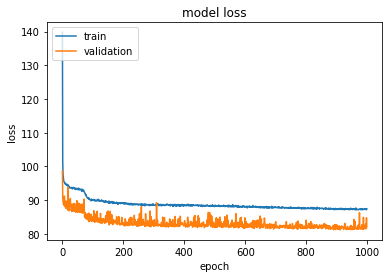

In [46]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

# labeled_df = X_df.apply(lambda x: d[x.name].fit_transform(x))
# labeled_df
# labeled_df.apply(lambda x: d[x.name].inverse_transform(x))

In [48]:
test = np.expand_dims(X_test[0], axis=0)

In [49]:
print(f"Predicted price: {model.predict(test)}")

Predicted price: [[34.837612]]
